In [2]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from encoding_information.information_estimation import *
from encoding_information.image_utils import *
from encoding_information.models.gaussian_process import StationaryGaussianProcess

from encoding_information.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as np
import yaml
from led_array.tf_util import prepare_test_dataset
import tensorflow.keras as tfk

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

2023-11-14 11:12:45.584649: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Opening BSCCM
Opened BSCCM


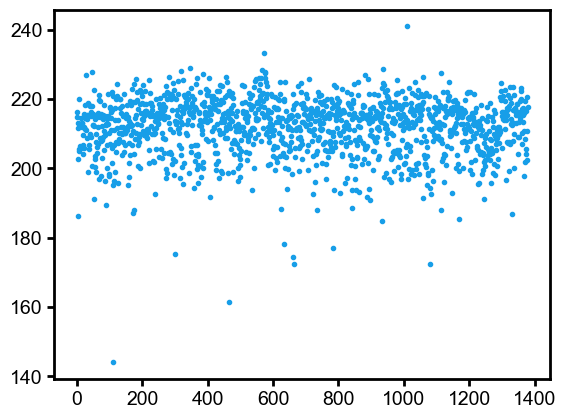

In [27]:
indices = bsccm.get_indices(batch=0)[::100]
images = load_bsccm_images(bsccm, 'LED119', indices=indices)

mean_photons = np.mean(images, axis=(1,2))

#plot mean_photons by image index
fig, ax = plt.subplots()
ax.plot(mean_photons, '.')


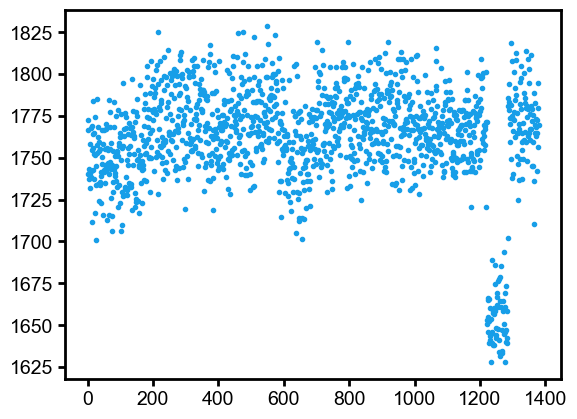

In [26]:
indices = bsccm.get_indices(batch=0)[::100]
images = load_bsccm_images(bsccm, 'Brightfield', indices=indices)

mean_photons = np.mean(images, axis=(1,2))

#plot mean_photons by image index
fig, ax = plt.subplots()
ax.plot(mean_photons, '.')


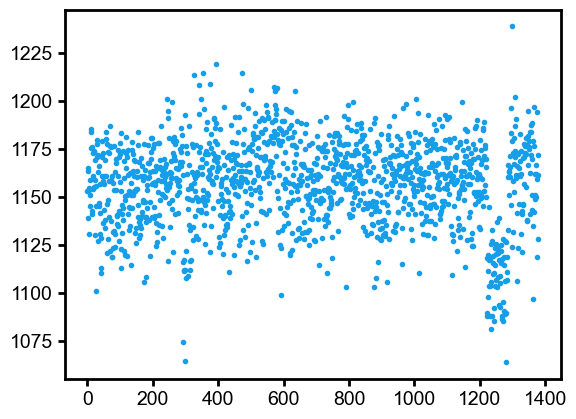

In [25]:
indices = bsccm.get_indices(batch=0)[::100]
images = load_bsccm_images(bsccm, 'DPC_Right', indices=indices)

mean_photons = np.mean(images, axis=(1,2))

#plot mean_photons by image index
fig, ax = plt.subplots()
ax.plot(mean_photons, '.')


In [32]:
bsccm.get_indices(batch=0)[::100][100]

62923

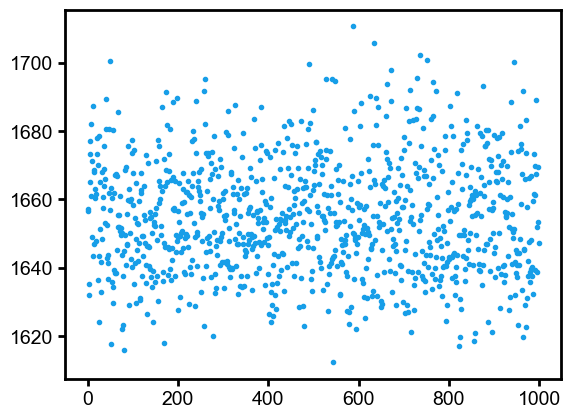

In [11]:
indices = bsccm.get_indices(batch=0)[124000:125000]
images = load_bsccm_images(bsccm, 'Brightfield', indices=indices)

mean_photons = np.mean(images, axis=(1,2))

#plot mean_photons by image index
fig, ax = plt.subplots()
ax.plot(mean_photons, '.')


In [33]:
bsccm.index_dataframe.iloc[360702]
bsccm.index_dataframe.iloc[62923]

position_in_fov_y_pix                                                   1042
position_in_fov_x_pix                                                   1803
detection_radius                                                       20.48
has_matched_histology_cell                                              True
fov_center_x                                                    -33639.91626
fov_center_y                                                     44597.96668
fov_center_z                                                     40908.37109
batch                                                                      0
antibodies                                                         unstained
imaging_date                                                         8/19/18
data_path                     antibodies_unstained/batch_0/slide_replicate_0
slide_replicate                                                            0
Name: 62923, dtype: object

: 